✔ Label column detected as: spam
✔ Required word columns found.


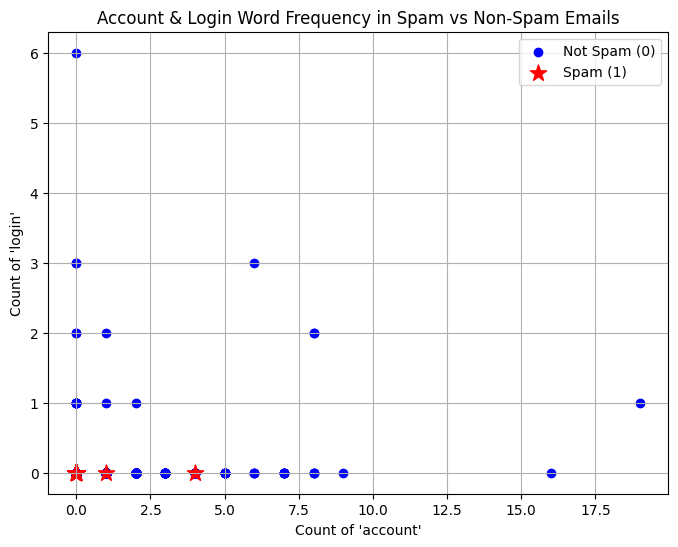

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. LOAD DATASET
# ---------------------------------------------------------
df = pd.read_csv("emails.csv")   # Change filename if required

# ---------------------------------------------------------
# 2. KEEP ONLY NUMERICAL COLUMNS
# ---------------------------------------------------------
df = df.select_dtypes(include=['int64', 'float64'])

# ---------------------------------------------------------
# 3. AUTO-DETECT LABEL COLUMN
# ---------------------------------------------------------
possible_labels = ["label", "Label", "spam", "Spam", "target", "Target", "label_num", "is_spam"]

label_col = None
for col in possible_labels:
    if col in df.columns:
        label_col = col
        break

if label_col is None:
    print("⚠️ No standard label column found!")
    print("👉 Run this to check columns: print(df.columns)")
    raise KeyError("Label column not found.")

print("✔ Label column detected as:", label_col)

# ---------------------------------------------------------
# 4. CHECK IF REQUIRED WORDS EXIST
# ---------------------------------------------------------
required_words = ["account", "login"]

for word in required_words:
    if word not in df.columns:
        print(f"⚠️ Column '{word}' not found in dataset.")
        print("👉 Run: print(df.columns)")
        raise KeyError(f"Missing column: {word}")

print("✔ Required word columns found.")

# ---------------------------------------------------------
# 5. SCATTER PLOT (ACCOUNT vs LOGIN)
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))

# Non-spam → 0
plt.scatter(
    df[df[label_col] == 0]["account"],
    df[df[label_col] == 0]["login"],
    color="blue",
    marker="o",
    label="Not Spam (0)"
)

# Spam → 1
plt.scatter(
    df[df[label_col] == 1]["account"],
    df[df[label_col] == 1]["login"],
    color="red",
    marker="*",
    s=150,
    label="Spam (1)"
)

plt.title("Account & Login Word Frequency in Spam vs Non-Spam Emails")
plt.xlabel("Count of 'account'")
plt.ylabel("Count of 'login'")
plt.legend()
plt.grid(True)
plt.show()
